In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
from scipy import stats
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")

In [3]:
src_table="car_table_l_wp.csv"

In [4]:
car_table = pd.read_csv(src_table, delimiter=',')

In [5]:
car_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10141 entries, 0 to 10140
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   year           10141 non-null  int64
 1   selling_price  10141 non-null  int64
 2   fuel           10141 non-null  int64
 3   seller_type    10141 non-null  int64
 4   transmission   10141 non-null  int64
 5   owner          10141 non-null  int64
 6   brand          10141 non-null  int64
 7   km_dr_gr       10141 non-null  int64
dtypes: int64(8)
memory usage: 633.9 KB


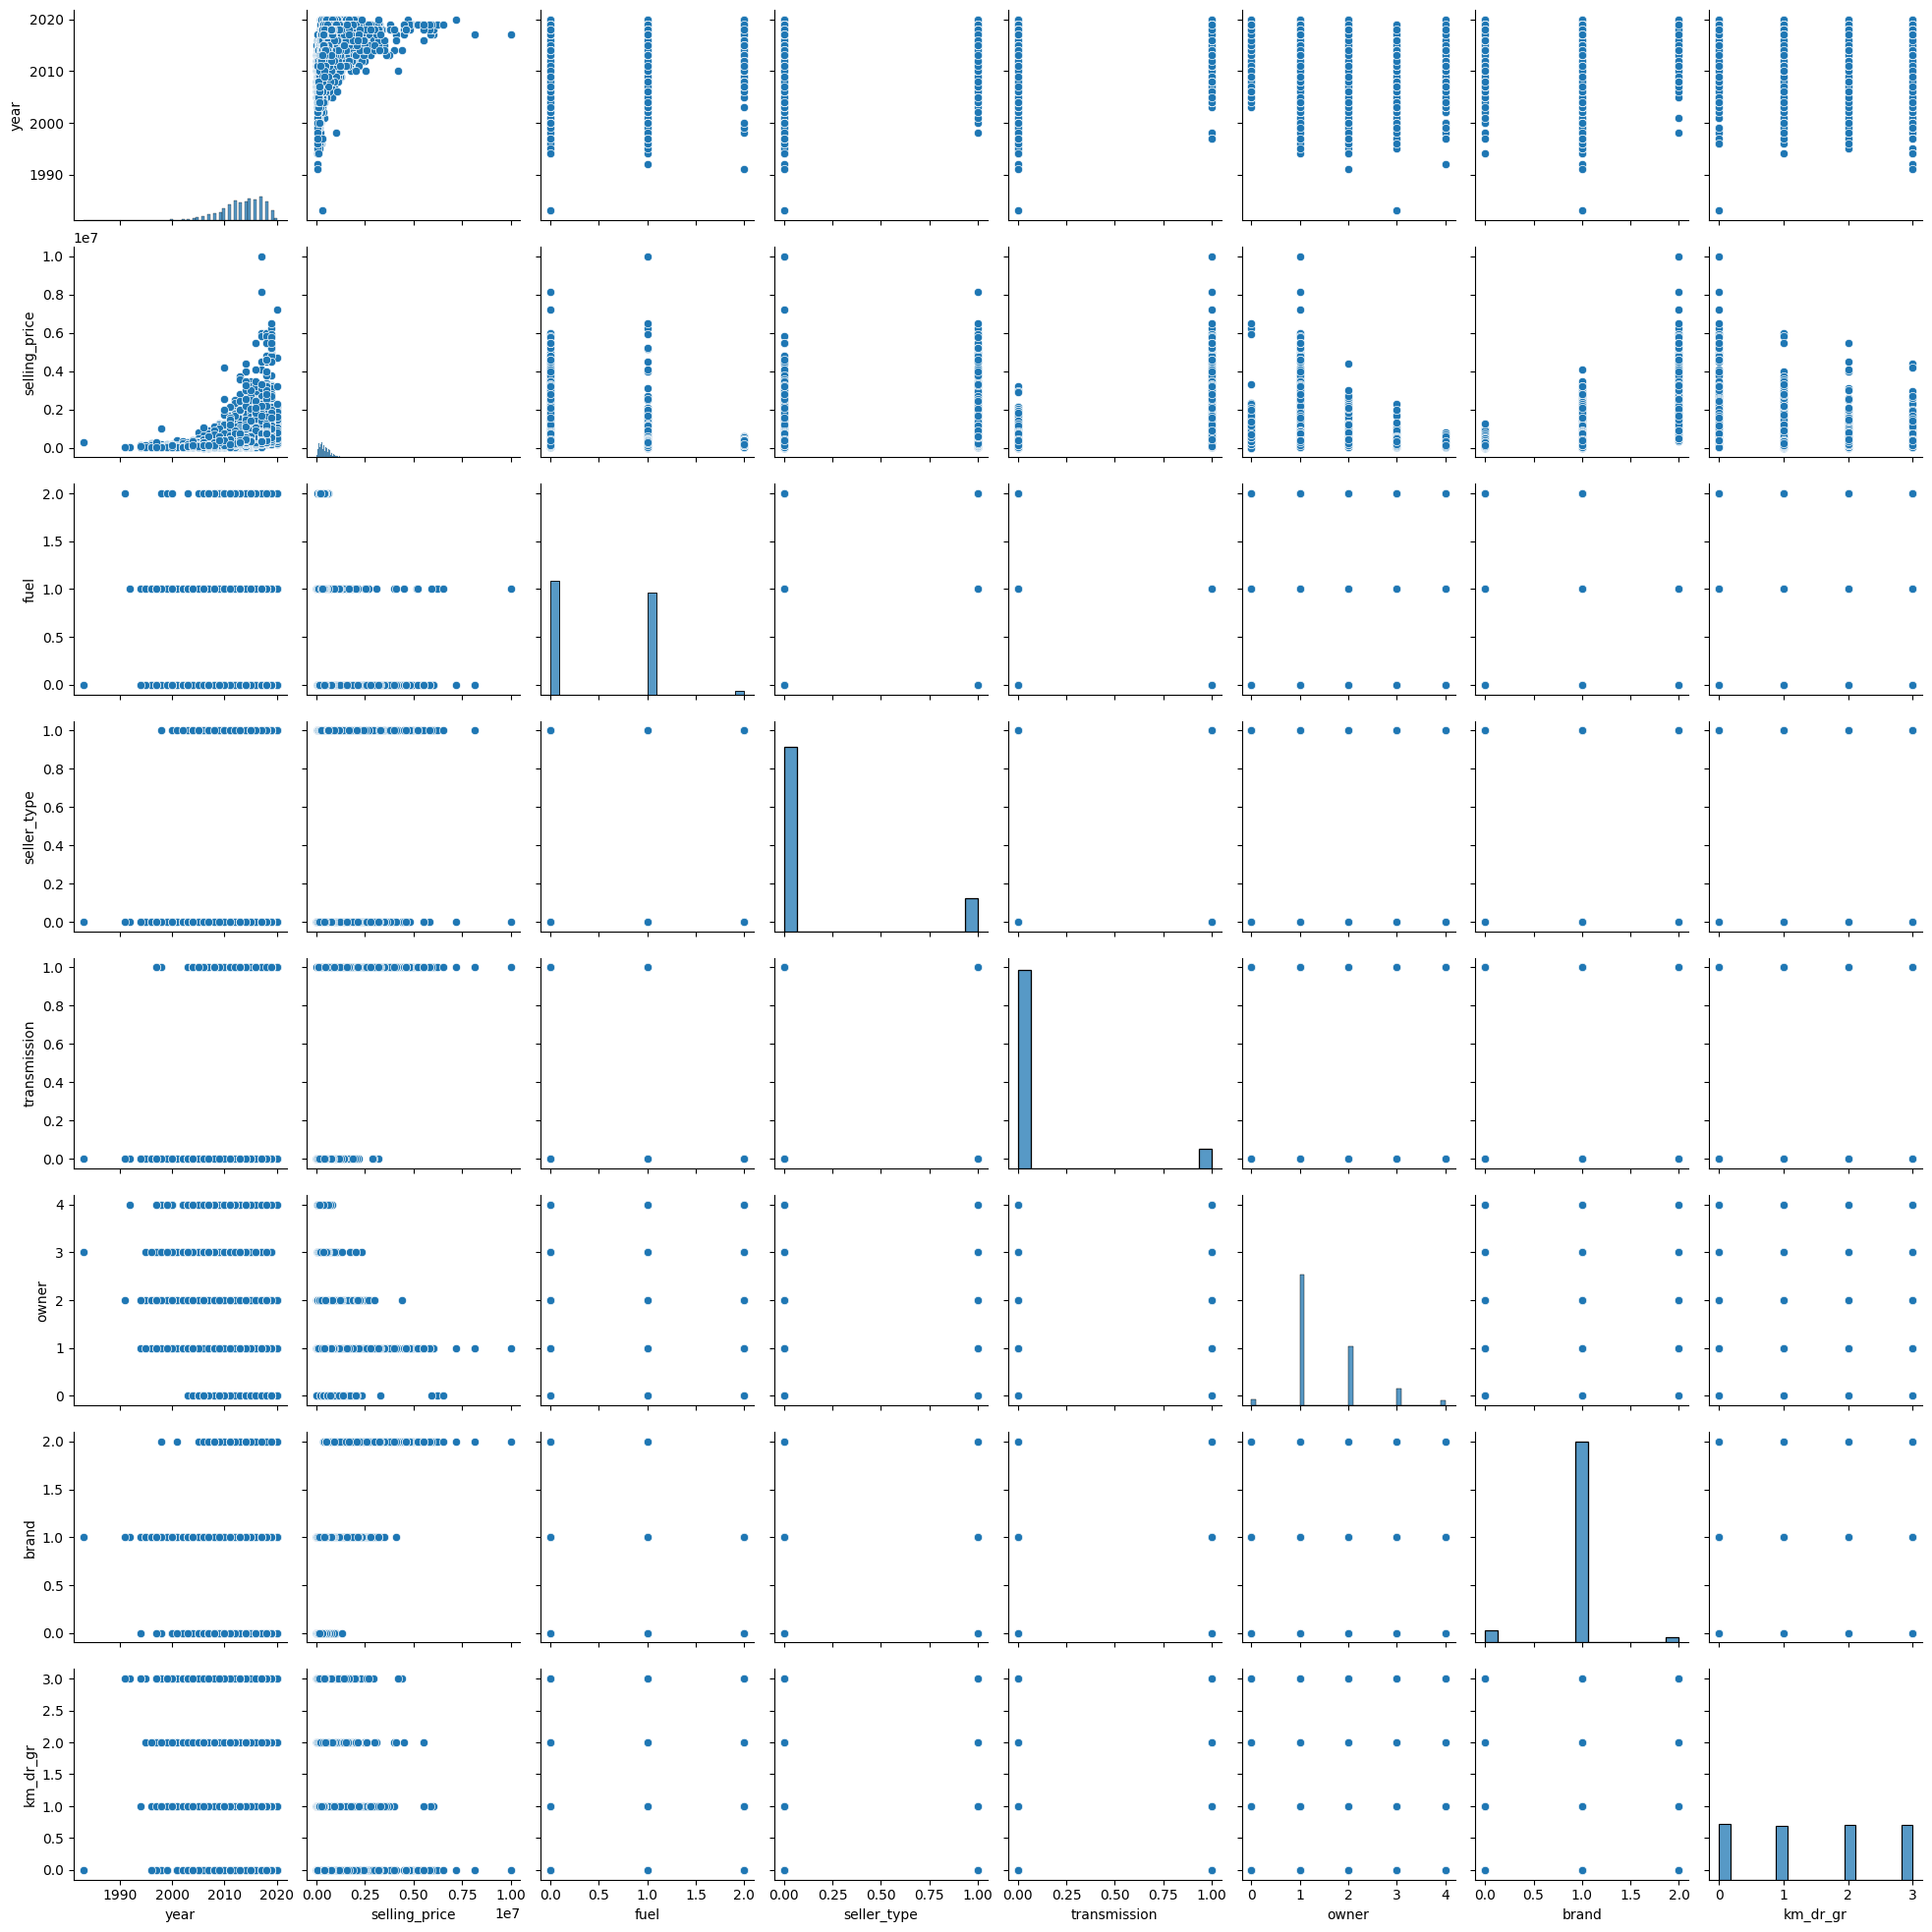

In [6]:
sns.pairplot(car_table, palette = 'hls')

In [7]:
X=car_table.drop(columns=['selling_price'],axis=1)
y=car_table['selling_price']

In [8]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
X=scalar.fit_transform(X)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42, shuffle=False,)

#scalar=MinMaxScaler()
#X_train=scalar.fit_transform(X_train)
#X_test=scalar.transform(X_test)

#scalar.fit(y_train)

#y_train = scalar.transform(y_train)
#y_test =scalar.transform(y_test)

print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

X_train shape (8112, 7)
X_test shape (2029, 7)
y_train shape (8112,)
y_test shape (2029,)


In [10]:
class MatrixLinearRegression:

    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)   # add ones vector
        XT_X_inv = np.linalg.inv(X.T @ X)   # (X.T * X) ** (-1) inverse matrix
        weights = np.linalg.multi_dot([XT_X_inv, X.T, y])   # XT_X_inv * X.T * y
        self.bias, self.weights = weights[0], weights[1:]

    def predict(self, X_test):
        return X_test @ self.weights + self.bias

In [11]:
matrix_linear_regression = MatrixLinearRegression()
matrix_linear_regression.fit(X, y)
matrix_lr_pred_res = matrix_linear_regression.predict(X)
matrix_lr_r2 = r2_score(y, matrix_lr_pred_res)
matrix_lr_mape = mean_absolute_percentage_error(y, matrix_lr_pred_res)

print(f'Matrix Linear regression  R2 score: {matrix_lr_r2}')
print(f'Matrix Linear regression MAPE: {matrix_lr_mape}', '\n')

print(f'weights: {matrix_linear_regression.bias, *matrix_linear_regression.weights}')
print(f'prediction: {matrix_lr_pred_res}')

Matrix Linear regression  R2 score: 0.5011563074130385
Matrix Linear regression MAPE: 0.7139069596855873 

weights: (-896887.7663802579, 1299413.0158066303, -498880.07087420113, 95913.36628412595, 589483.043660589, -76483.19560367614, 1015414.7757702081, -137869.58275894076)
prediction: [545990.34397364 714354.58112696 651348.15606607 ... 257967.32533218
 239329.33988167 366930.27797937]
